In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cleaned_data = pd.read_csv('../data/cleaned_movies.csv')

In [3]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2275 entries, 0 to 2274
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   popularity             2275 non-null   float64
 1   title                  2275 non-null   object 
 2   vote_average           2275 non-null   float64
 3   vote_count             2275 non-null   int64  
 4   budget                 2275 non-null   int64  
 5   imdb_id                2275 non-null   object 
 6   runtime                2275 non-null   int64  
 7   years_from_release     2275 non-null   int64  
 8   genre_Action           2275 non-null   bool   
 9   genre_Adventure        2275 non-null   bool   
 10  genre_Animation        2275 non-null   bool   
 11  genre_Comedy           2275 non-null   bool   
 12  genre_Crime            2275 non-null   bool   
 13  genre_Documentary      2275 non-null   bool   
 14  genre_Drama            2275 non-null   bool   
 15  genr

In [4]:
cleaned_data.head()

,popularity,title,vote_average,vote_count,budget,imdb_id,runtime,years_from_release,genre_Action,genre_Adventure,...,genre_Mystery,genre_Romance,genre_Science_Fiction,genre_TV_Movie,genre_Thriller,genre_War,genre_Western,domestic,international,worldwide
0,3197.278,Venom: The Last Dance,6.500,759,120000000,tt16366836,109,0,True,True,...,False,False,True,False,False,False,False,128094490.0,308500000.0,4.365945e+08
1,2204.248,Terrifier 3,6.925,1012,2000000,tt27911000,125,0,False,False,...,True,False,False,False,True,False,False,53981071.0,31395883.0,8.537695e+07
2,1868.856,The Wild Robot,8.500,2899,78000000,tt29623480,102,0,False,False,...,False,False,True,False,False,False,False,137913995.0,171143000.0,3.090570e+08
3,1978.412,Gladiator II,6.800,400,310000000,tt9218128,148,0,True,True,...,False,False,False,False,False,False,False,0.0,87000000.0,8.700000e+07
4,1490.952,Deadpool & Wolverine,7.700,5465,200000000,tt6263850,128,0,True,False,...,False,False,True,False,False,False,False,636745858.0,701154969.0,1.337901e+09


In [5]:
cleaned_data.shape, cleaned_data.dtypes

((2275, 30),
 popularity               float64
 title                     object
 vote_average             float64
 vote_count                 int64
 budget                     int64
 imdb_id                   object
 runtime                    int64
 years_from_release         int64
 genre_Action                bool
 genre_Adventure             bool
 genre_Animation             bool
 genre_Comedy                bool
 genre_Crime                 bool
 genre_Documentary           bool
 genre_Drama                 bool
 genre_Family                bool
 genre_Fantasy               bool
 genre_History               bool
 genre_Horror                bool
 genre_Music                 bool
 genre_Mystery               bool
 genre_Romance               bool
 genre_Science_Fiction       bool
 genre_TV_Movie              bool
 genre_Thriller              bool
 genre_War                   bool
 genre_Western               bool
 domestic                 float64
 international            float64
 

In [6]:
numerical_data = cleaned_data.select_dtypes(include=[np.number, np.bool_])
numerical_data.head()

,popularity,vote_average,vote_count,budget,runtime,years_from_release,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,...,genre_Mystery,genre_Romance,genre_Science_Fiction,genre_TV_Movie,genre_Thriller,genre_War,genre_Western,domestic,international,worldwide
0,3197.278,6.500,759,120000000,109,0,True,True,False,False,...,False,False,True,False,False,False,False,128094490.0,308500000.0,4.365945e+08
1,2204.248,6.925,1012,2000000,125,0,False,False,False,False,...,True,False,False,False,True,False,False,53981071.0,31395883.0,8.537695e+07
2,1868.856,8.500,2899,78000000,102,0,False,False,True,False,...,False,False,True,False,False,False,False,137913995.0,171143000.0,3.090570e+08
3,1978.412,6.800,400,310000000,148,0,True,True,False,False,...,False,False,False,False,False,False,False,0.0,87000000.0,8.700000e+07
4,1490.952,7.700,5465,200000000,128,0,True,False,False,True,...,False,False,True,False,False,False,False,636745858.0,701154969.0,1.337901e+09


In [7]:
numerical_data.describe()

,popularity,vote_average,vote_count,budget,runtime,years_from_release,domestic,international,worldwide
count,2275.000000,2275.000000,2275.000000,2.275000e+03,2275.00000,2275.000000,2.275000e+03,2.275000e+03,2.275000e+03
mean,67.329013,6.863621,5061.143736,5.648515e+07,113.56967,16.688352,8.428755e+07,1.190174e+08,2.033751e+08
std,129.834017,0.771353,5046.943931,6.103956e+07,22.49579,14.404876,1.036010e+08,1.823486e+08,2.760846e+08
min,15.491000,2.500000,1.000000,5.000000e+00,0.00000,0.000000,0.000000e+00,0.000000e+00,4.160000e+02
25%,31.325000,6.344500,1670.000000,1.300000e+07,98.00000,6.000000,1.696933e+07,7.128046e+06,3.327272e+07
50%,42.508000,6.900000,3476.000000,3.300000e+07,110.00000,14.000000,5.242195e+07,5.249623e+07,1.073474e+08
75%,66.488500,7.400000,6606.000000,8.000000e+07,125.00000,23.000000,1.126069e+08,1.507235e+08,2.613031e+08
max,3197.278000,8.700000,36538.000000,4.600000e+08,233.00000,91.000000,9.366622e+08,2.138484e+09,2.923706e+09


<Axes: >

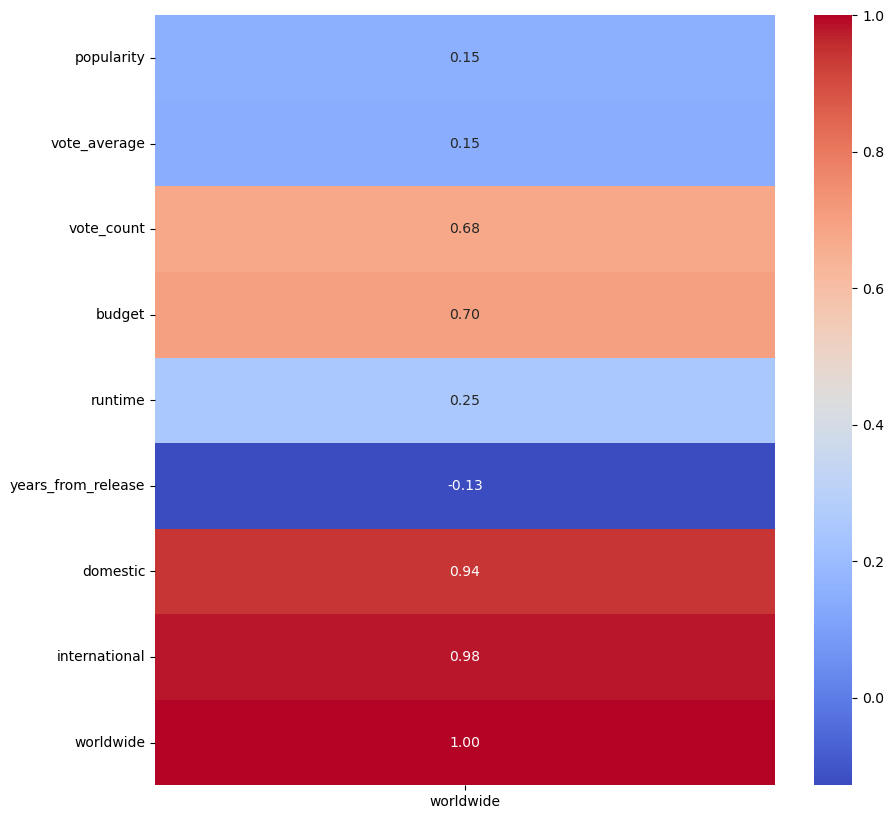

In [9]:
plt.figure(figsize=(10, 10))
data = numerical_data[['popularity', 'vote_average', 'vote_count', 'budget', 'runtime', 'years_from_release', 'domestic', 'international', 'worldwide']]
sns.heatmap(data.corr(method ='pearson')['worldwide'].to_frame(), annot=True, cmap='coolwarm', fmt='.2f')

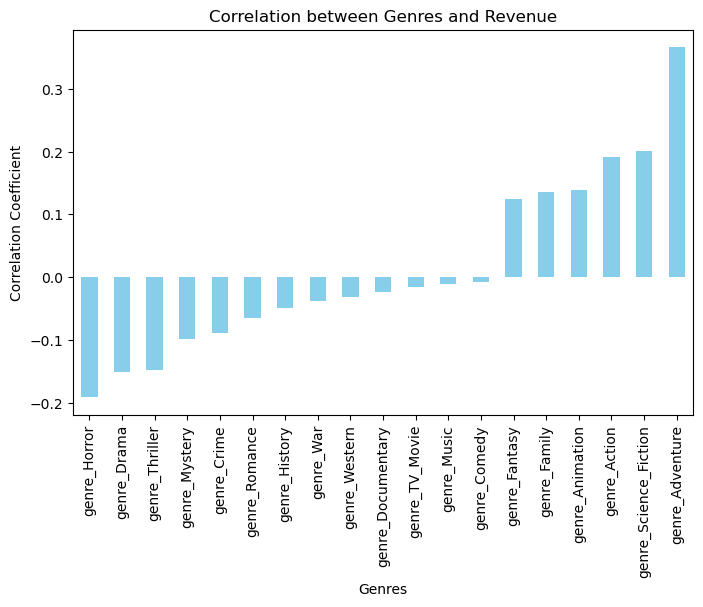

In [14]:
genre_data = numerical_data[['genre_Action', 'genre_Adventure', 'genre_Animation', 'genre_Comedy', 'genre_Crime', 'genre_Documentary', 'genre_Drama', 'genre_Family', 'genre_Fantasy', 'genre_History', 'genre_Horror', 'genre_Music', 'genre_Mystery', 'genre_Romance', 'genre_Science_Fiction', 'genre_TV_Movie', 'genre_Thriller', 'genre_War', 'genre_Western']]

correlations = genre_data.corrwith(numerical_data['worldwide'])

# Vẽ biểu đồ hệ số tương quan
correlations.sort_values().plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title('Correlation between Genres and Revenue')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Genres')
plt.show()

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(cleaned_data.select_dtypes(include=[np.number]))


pca = PCA(n_components=3)  
principal_components = pca.fit_transform(numerical_data_scaled)
cleaned_data

,popularity,title,vote_average,vote_count,budget,imdb_id,runtime,years_from_release,genre_Action,genre_Adventure,...,genre_Mystery,genre_Romance,genre_Science_Fiction,genre_TV_Movie,genre_Thriller,genre_War,genre_Western,domestic,international,worldwide
0,3197.278,Venom: The Last Dance,6.500,759,120000000,tt16366836,109,0,True,True,...,False,False,True,False,False,False,False,128094490.0,308500000.0,4.365945e+08
1,2204.248,Terrifier 3,6.925,1012,2000000,tt27911000,125,0,False,False,...,True,False,False,False,True,False,False,53981071.0,31395883.0,8.537695e+07
2,1868.856,The Wild Robot,8.500,2899,78000000,tt29623480,102,0,False,False,...,False,False,True,False,False,False,False,137913995.0,171143000.0,3.090570e+08
3,1978.412,Gladiator II,6.800,400,310000000,tt9218128,148,0,True,True,...,False,False,False,False,False,False,False,0.0,87000000.0,8.700000e+07
4,1490.952,Deadpool & Wolverine,7.700,5465,200000000,tt6263850,128,0,True,False,...,False,False,True,False,False,False,False,636745858.0,701154969.0,1.337901e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312,25.383,The Lincoln Lawyer,7.205,3221,40000000,tt1189340,119,13,False,False,...,False,False,False,False,True,False,False,58009200.0,28743152.0,8.675235e+07
2313,25.381,The Midnight Meat Train,6.100,1108,15000000,tt0805570,98,16,False,False,...,True,False,False,False,False,False,False,83361.0,3450952.0,3.534313e+06
2314,25.373,Vettaiyan,5.800,12,19000000,tt26936666,161,0,True,False,...,False,False,False,False,False,False,False,0.0,2397623.0,2.397623e+06
2315,25.373,The Return of the Living Dead,7.158,2039,4000000,tt0089907,91,39,False,False,...,False,False,False,False,False,False,False,14237880.0,665.0,1.424131e+07


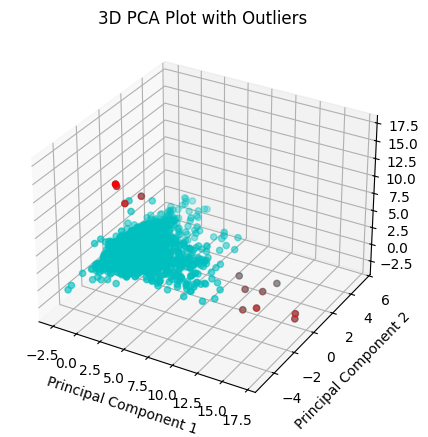

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c='c', marker='o')

outliers = (principal_components[:, 0] > 10) | (principal_components[:, 1] > 10) | (principal_components[:, 2] > 10)
ax.scatter(principal_components[outliers, 0], principal_components[outliers, 1], principal_components[outliers, 2], c='r', marker='o')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.zaxis.labelpad=-0.8
ax.set_title('3D PCA Plot with Outliers')

plt.show()

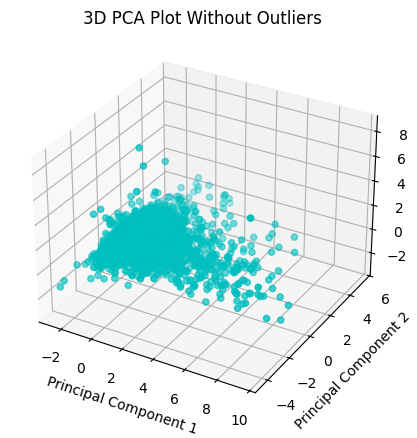

In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(cleaned_data.select_dtypes(include=[np.number]))
pca = PCA(n_components=3)
principal_components = pca.fit_transform(numerical_data_scaled)
outlier_threshold = 10
outliers = (principal_components[:, 0] > outlier_threshold) | (principal_components[:, 1] > outlier_threshold) | (principal_components[:, 2] > outlier_threshold)

outlier_entries = cleaned_data[outliers]
principal_components_no_outliers = principal_components[~outliers]
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(principal_components_no_outliers[:, 0], principal_components_no_outliers[:, 1], principal_components_no_outliers[:, 2], c='c', marker='o')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.zaxis.labelpad = -0.8
ax.set_title('3D PCA Plot Without Outliers')

plt.show()

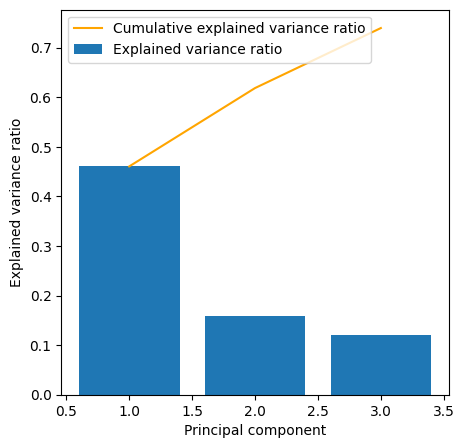

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(5, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, label='Explained variance ratio')
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), label='Cumulative explained variance ratio', color='orange')
plt.xlabel('Principal component')
plt.ylabel('Explained variance ratio')
plt.legend()
plt.show()

In [42]:
outlier_entries = cleaned_data[outliers]
outlier_entries

,popularity,title,vote_average,vote_count,budget,imdb_id,runtime,years_from_release,genre_Action,genre_Adventure,...,genre_Mystery,genre_Romance,genre_Science_Fiction,genre_TV_Movie,genre_Thriller,genre_War,genre_Western,domestic,international,worldwide
0,3197.278,Venom: The Last Dance,6.500,759,120000000,tt16366836,109,0,True,True,...,False,False,True,False,False,False,False,128094490.0,3.085000e+08,4.365945e+08
1,2204.248,Terrifier 3,6.925,1012,2000000,tt27911000,125,0,False,False,...,True,False,False,False,True,False,False,53981071.0,3.139588e+07,8.537695e+07
2,1868.856,The Wild Robot,8.500,2899,78000000,tt29623480,102,0,False,False,...,False,False,True,False,False,False,False,137913995.0,1.711430e+08,3.090570e+08
3,1978.412,Gladiator II,6.800,400,310000000,tt9218128,148,0,True,True,...,False,False,False,False,False,False,False,0.0,8.700000e+07,8.700000e+07
56,238.954,Avengers: Infinity War,8.200,29696,300000000,tt4154756,149,6,True,True,...,False,False,True,False,False,False,False,678815482.0,1.373600e+09,2.052415e+09
62,212.016,Spider-Man: No Way Home,8.000,20104,200000000,tt10872600,148,3,True,True,...,False,False,True,False,False,False,False,814866759.0,1.137832e+09,1.952724e+09
66,291.098,The Avengers,7.720,30711,220000000,tt0848228,143,12,True,True,...,False,False,True,False,False,False,False,623357910.0,8.971806e+08,1.520539e+09
77,181.446,Avatar: The Way of Water,7.600,11896,460000000,tt1630029,192,2,True,True,...,False,False,True,False,False,False,False,684075767.0,1.636175e+09,2.320250e+09
80,178.738,Titanic,7.900,25301,200000000,tt0120338,194,27,False,False,...,False,True,False,False,False,False,False,674292608.0,1.590451e+09,2.264751e+09
104,121.765,Avengers: Endgame,8.200,25585,356000000,tt4154796,181,5,True,True,...,False,False,True,False,False,False,False,858373000.0,1.941066e+09,2.799439e+09


In [43]:
removed_outliers = cleaned_data[~outliers]
removed_outliers.to_csv('../data/cleaned_movies_no_outliers.csv', index=False)